A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [1]:
!ls ../data/us_dot/otp/

On_Time_On_Time_Performance_2015_1.zip	On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_2.zip	On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_3.zip	On_Time_On_Time_Performance_2015_8.zip
On_Time_On_Time_Performance_2015_4.zip	readme.html
On_Time_On_Time_Performance_2015_5.zip


For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [2]:
!unzip --help

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [3]:
!unzip -l ../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
230183662  2015-10-05 15:33   On_Time_On_Time_Performance_2015_8.csv
    12054  2015-10-05 15:33   readme.html
---------                     -------
230195716                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [6]:
!unzip -o ../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip readme.html -d .

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  inflating: ./readme.html           


### Take a look at the beginning of the readme file

using the shell

In [7]:
!head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [12]:
IFrame('https://www.elpais.com', 800, 600)

In [10]:
from IPython.display import IFrame

IFrame('readme.html', 800, 600)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [15]:
!unzip ../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip -d .

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  inflating: ./On_Time_On_Time_Performance_2015_8.csv  
replace ./readme.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [16]:
!head -n 5 On_Time_On_Time_Performance_2015_8.csv

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

In [18]:
import pandas as pd

df = pd.read_csv('../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip')



ValueError: ('Multiple files found in compressed zip file %s', "['On_Time_On_Time_Performance_2015_8.csv', 'readme.html']")

In [24]:
from zipfile import ZipFile

zip_file = ZipFile('../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip')

zip_file.filelist

[<ZipInfo filename='On_Time_On_Time_Performance_2015_8.csv' compress_type=deflate filemode='-rw-r--r--' file_size=230183662 compress_size=25723470>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12054 compress_size=2208>]

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [26]:
csv_file = zip_file.open(zip_file.filelist[0])

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [27]:
df = pd.read_csv(csv_file)  

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
f = open('tips.csv')


In [31]:
f.readline()

'total_bill,tip,sex,smoker,day,time,size\n'

In [32]:
f.readline()

'16.99,1.01,Female,No,Sun,Dinner,2\n'

In [33]:
lines = f.readlines()

In [34]:
f.closed

False

In [35]:
f.readline()

''

In [36]:
pd.read_csv(f)

EmptyDataError: No columns to parse from file

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [38]:
pd.options.display.max_columns = None

In [39]:
df.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,854.0,-6.0,0.0,0.0,-1.0,0900-0959,25.0,919.0,1132.0,15.0,1213,1147.0,-26.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,373.0,353.0,313.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,858.0,-2.0,0.0,0.0,-1.0,0900-0959,33.0,931.0,1147.0,31.0,1213,1218.0,5.0,5.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,380.0,316.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,902.0,2.0,2.0,0.0,0.0,0900-0959,43.0,945.0,1211.0,8.0,1213,1219.0,6.0,6.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,377.0,326.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,39.0,936.0,1207.0,28.0,1213,1235.0,22.0,22.0,1.0,1.0,1200-1259,0.0,NaN,0.0,373.0,398.0,331.0,1.0,2475.0,10,0.0,0.0,22.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,46.0,943.0,1209.0,14.0,1213,1223.0,10.0,10.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,386.0,326.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [40]:
len(df)

510536

In [41]:
df.shape

(510536, 110)

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [43]:
df.count()[df.count() < 1000]

Div2Airport         10
Div2AirportID       10
Div2AirportSeqID    10
Div2WheelsOn        10
Div2TotalGTime      10
Div2LongestGTime    10
Div2WheelsOff        3
Div2TailNum          3
Div3Airport          0
Div3AirportID        0
Div3AirportSeqID     0
Div3WheelsOn         0
Div3TotalGTime       0
Div3LongestGTime     0
Div3WheelsOff        0
Div3TailNum          0
Div4Airport          0
Div4AirportID        0
Div4AirportSeqID     0
Div4WheelsOn         0
Div4TotalGTime       0
Div4LongestGTime     0
Div4WheelsOff        0
Div4TailNum          0
Div5Airport          0
Div5AirportID        0
Div5AirportSeqID     0
Div5WheelsOn         0
Div5TotalGTime       0
Div5LongestGTime     0
Div5WheelsOff        0
Div5TailNum          0
Unnamed: 109         0
dtype: int64

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [45]:
nearly_empty_columns = df.count()[df.count() < 1000]

In [51]:
only_full = df.drop(nearly_empty_columns.index, axis=1)

In [54]:
another_way = df.dropna(thresh=1000, axis=1)

In [62]:
another_way.shape == only_full.shape

True

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [73]:
only_full.columns[only_full.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [74]:
tail_nums = only_full['TailNum']

In [76]:
%%timeit
american = tail_nums.str.endswith('AA')

161 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [81]:
%%timeit
american = []

for tail_num in tail_nums:
    if type(tail_num) == str:
        american.append(tail_num.endswith('AA'))

172 ms ± 6.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
origin_col_names = only_full.columns[only_full.columns.str.contains('Origin')]

only_full[origin_col_names].head(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
0,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
2,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
3,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
4,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22


So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [85]:
df2 = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df2.sample(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance
175321,2015-08-09,7,WN,N7722B,2987,HOU,"Houston, TX",Texas,AUS,"Austin, TX",Texas,1804.0,-1.0,27.0,148.0
123793,2015-08-05,3,DL,N803DN,629,ATL,"Atlanta, GA",Georgia,DTW,"Detroit, MI",Michigan,914.0,-1.0,91.0,594.0
387497,2015-08-08,6,DL,N891AT,2370,MCI,"Kansas City, MO",Missouri,SLC,"Salt Lake City, UT",Utah,1434.0,-6.0,130.0,920.0
354577,2015-08-26,3,UA,N436UA,324,IAH,"Houston, TX",Texas,SJC,"San Jose, CA",California,903.0,-4.0,201.0,1608.0
292453,2015-08-28,5,MQ,N691MQ,3578,MIA,"Miami, FL",Florida,CVG,"Cincinnati, OH",Kentucky,1932.0,0.0,128.0,948.0


## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [86]:
df2.dtypes

FlightDate          object
DayOfWeek            int64
Carrier             object
TailNum             object
FlightNum            int64
Origin              object
OriginCityName      object
OriginStateName     object
Dest                object
DestCityName        object
DestStateName       object
DepTime            float64
DepDelay           float64
AirTime            float64
Distance           float64
dtype: object

In [87]:
df2.describe()

,DayOfWeek,FlightNum,DepTime,DepDelay,AirTime,Distance
count,510536.000000,510536.000000,505817.000000,505817.000000,503956.000000,510536.000000
mean,3.993513,2132.089949,1336.244138,9.932045,113.566323,834.824428
std,2.073523,1731.122018,502.938454,36.920822,72.707285,621.236097
min,1.000000,1.000000,1.000000,-42.000000,8.000000,31.000000
25%,2.000000,719.000000,917.000000,-5.000000,60.000000,373.000000
50%,4.000000,1681.000000,1330.000000,-1.000000,94.000000,651.000000
75%,6.000000,3086.000000,1744.000000,8.000000,144.000000,1069.000000
max,7.000000,9855.000000,2400.000000,1878.000000,651.000000,4983.000000


Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our float hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [98]:
df2['DepTime'].sample(5)

367264     554.0
443966    1903.0
439315     851.0
108305     800.0
39737     1244.0
Name: DepTime, dtype: float64

In [106]:
def float_hour_to_string(float_hour):
    
    str_input = str(float_hour).zfill(6)
    
    hour = str_input[:2]
    minute = str_input[2:4]
    
    string_rep = '%s:%s' % (hour, minute)
    
    return string_rep

print(float_hour_to_string(554.0))
print(float_hour_to_string(1903.0))
print(float_hour_to_string(851.0))
print(float_hour_to_string(800.0))
print(float_hour_to_string(1244.0))

05:54
19:03
08:51
08:00
12:44


In [136]:
def float_hour_to_string(float_hour):
    
    hour = (float_hour // 100) % 24
    minutes = float_hour % 100
    
    return '%.2d:%.2d' % (hour, minutes)

print(float_hour_to_string(554.0))
print(float_hour_to_string(1903.0))
print(float_hour_to_string(851.0))
print(float_hour_to_string(800.0))
print(float_hour_to_string(1244.0))
print(float_hour_to_string(2400.0))

05:54
19:03
08:51
08:00
12:44
00:00


Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

In [118]:
pd.to_datetime('2018-05-26 11:03')

Timestamp('2018-05-26 11:03:00')

In [114]:
df2.sample(1)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance
142308,2015-08-06,4,VX,N634VA,917,LAS,"Las Vegas, NV",Nevada,SFO,"San Francisco, CA",California,2121.0,56.0,63.0,414.0


In [144]:
date_strings = df['FlightDate']

time_strings = df['DepTime'].map(float_hour_to_string, na_action='ignore')

datetimes = pd.to_datetime(date_strings + ' ' + time_strings)

datetimes.sample(3)

26201    2015-08-21 07:52:00
506056   2015-08-12 12:23:00
170591   2015-08-24 17:41:00
dtype: datetime64[ns]

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [149]:
datetimes.count()

505817

In [150]:
df2['DepTime'].count()

505817

In [151]:
df2['DepDateTime'] = datetimes

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
df2.head()

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
0,2015-08-02,7,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,854.0,-6.0,313.0,2475.0,2015-08-02 08:54:00
1,2015-08-03,1,AA,N784AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,858.0,-2.0,316.0,2475.0,2015-08-03 08:58:00
2,2015-08-04,2,AA,N793AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,902.0,2.0,326.0,2475.0,2015-08-04 09:02:00
3,2015-08-05,3,AA,N787AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,331.0,2475.0,2015-08-05 08:57:00
4,2015-08-06,4,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,326.0,2475.0,2015-08-06 08:57:00


### Inspect the types, see if everything is in order

In [159]:
df2.dtypes

FlightDate                 object
DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepTime                   float64
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [166]:
df2.sort_values('DepDelay', ascending=False).head(5) 

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
4106,2015-08-01,6,AA,N479AA,96,RIC,"Richmond, VA",Virginia,DFW,"Dallas/Fort Worth, TX",Texas,1427.0,1878.0,156.0,1158.0,2015-08-01 14:27:00
7165,2015-08-23,7,AA,N5ERAA,270,HNL,"Honolulu, HI",Hawaii,LAX,"Los Angeles, CA",California,825.0,1515.0,299.0,2556.0,2015-08-23 08:25:00
19225,2015-08-01,6,AA,N503AA,1291,MKE,"Milwaukee, WI",Wisconsin,DFW,"Dallas/Fort Worth, TX",Texas,627.0,1402.0,108.0,853.0,2015-08-01 06:27:00
33642,2015-08-10,1,AA,N469AA,2263,CMH,"Columbus, OH",Ohio,DFW,"Dallas/Fort Worth, TX",Texas,824.0,1259.0,125.0,926.0,2015-08-10 08:24:00
7028,2015-08-10,1,AA,N5DHAA,266,LIH,"Lihue, HI",Hawaii,LAX,"Los Angeles, CA",California,1033.0,1235.0,292.0,2615.0,2015-08-10 10:33:00


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [168]:
df2['DepDelay'].describe()

count    505817.000000
mean          9.932045
std          36.920822
min         -42.000000
25%          -5.000000
50%          -1.000000
75%           8.000000
max        1878.000000
Name: DepDelay, dtype: float64

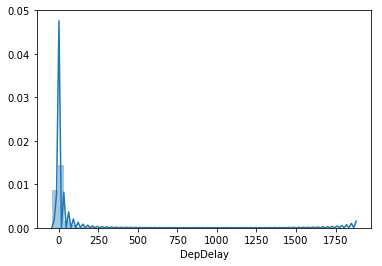

In [173]:
import seaborn as sns
%matplotlib inline

sns.distplot(df2['DepDelay'].dropna())

(-50, 250)

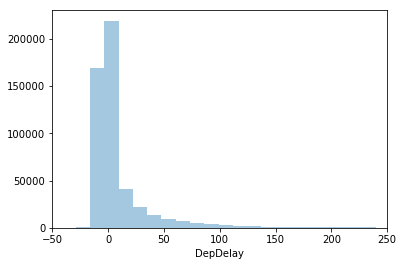

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(df2['DepDelay'].dropna(), bins = 150, kde=False)

axes = plt.gca() 
axes.set_xlim(-50, 250)

Also: remember, a quick look at the correlation between the numerical variables is extremely easy with pandas and seaborn.

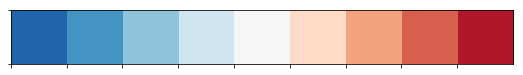

In [183]:
palette = sns.color_palette("RdBu_r", 9)

sns.palplot(palette)

In [185]:
sns.clustermap?

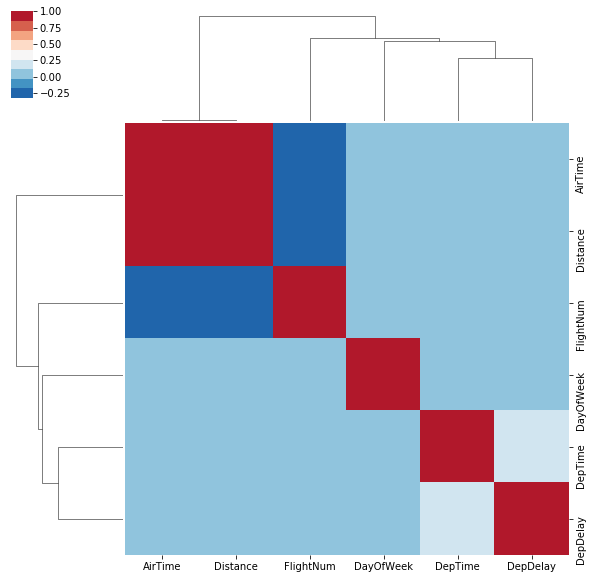

In [186]:
correlations = df2.corr()
sns.clustermap(correlations, cmap=palette)

#### Exercise

American Airlines is very common among the top delayed flights. Does that mean it is a significantly worse performer than other airlines? Let's check, examining the distribution of delays for different airlines.

Extract max, mean, and std of DepDelay for each airline (Carrier)

In [189]:
df2.groupby('Carrier')['DepDelay'].agg(['max', 'mean', 'std'])

,max,mean,std
Carrier,,,
AA,1878.0,9.357355,40.060019
AS,514.0,3.668762,24.959419
B6,522.0,14.604436,41.942031
DL,1207.0,7.746436,35.728115
EV,762.0,7.785358,36.607800
F9,726.0,8.849347,40.141518
HA,1037.0,4.819096,29.487122
MQ,1171.0,8.275043,38.252089
NK,679.0,22.256118,49.205307


In [190]:
df2.groupby('Carrier')['DepDelay'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Carrier,,,,,,,,
NK,10257.0,22.256118,49.205307,-25.0,-4.0,2.0,28.0,679.0
B6,23579.0,14.604436,41.942031,-26.0,-5.0,-1.0,14.0,522.0
UA,45101.0,14.306113,39.421729,-36.0,-3.0,1.0,13.0,739.0
WN,107146.0,11.738553,33.618683,-21.0,-3.0,0.0,11.0,620.0
AA,79025.0,9.357355,40.060019,-27.0,-5.0,-2.0,6.0,1878.0
VX,5667.0,8.900653,30.052117,-22.0,-4.0,-1.0,7.0,441.0
F9,8118.0,8.849347,40.141518,-29.0,-8.0,-4.0,7.0,726.0
MQ,23240.0,8.275043,38.252089,-35.0,-6.0,-3.0,4.0,1171.0
EV,47875.0,7.785358,36.607800,-39.0,-6.0,-3.0,3.0,762.0


#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [191]:
df2.groupby('TailNum')['DepDelay'].mean().sort_values(ascending=False) 

TailNum
N37018    293.000000
N218UA    270.000000
N283AY    208.000000
N795UA    193.000000
N7AEAA    191.666667
N182DN    187.500000
N793UA    136.750000
N7AHAA    115.250000
N7BPAA     98.500000
N7BXAA     92.800000
N861DA     92.000000
N357AA     90.047619
N197DN     84.250000
N8AHAA     82.500000
N7AVAA     74.800000
N13110     74.187500
N26909     73.000000
N225UA     71.666667
N448SW     71.473684
N665UA     71.000000
N7AMAA     66.571429
N222UA     66.000000
N7CBAA     65.500000
N363AA     65.000000
N654UA     64.000000
N780UA     62.368421
N374SW     61.173913
N7CAAA     60.000000
N76064     59.000000
N7ASAA     59.000000
             ...    
N455CA     -1.903614
N829AW     -1.962264
N293AY     -2.000000
N668US     -2.000000
N441SW     -2.094972
N14972     -2.108696
N12530     -2.229167
N931MQ     -2.242938
N8942A     -2.297143
N799AS     -2.306818
N184DN     -2.333333
N823AS     -2.355705
N429SW     -2.382022
N952FR     -2.482014
N518AS     -2.567568
N763AS     -2.618280
N629B

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [193]:
delay_distribution_byplane = df2.groupby('TailNum')['DepDelay'].describe().sort_values(by='mean', ascending=False) 
delay_distribution_byplane

,count,mean,std,min,25%,50%,75%,max
TailNum,,,,,,,,
N37018,2.0,293.000000,142.835570,192.0,242.50,293.0,343.50,394.0
N218UA,1.0,270.000000,NaN,270.0,270.00,270.0,270.00,270.0
N283AY,2.0,208.000000,0.000000,208.0,208.00,208.0,208.00,208.0
N795UA,1.0,193.000000,NaN,193.0,193.00,193.0,193.00,193.0
N7AEAA,3.0,191.666667,327.649711,1.0,2.50,4.0,287.00,570.0
N182DN,2.0,187.500000,219.910209,32.0,109.75,187.5,265.25,343.0
N793UA,4.0,136.750000,152.735883,9.0,9.00,112.5,240.25,313.0
N7AHAA,4.0,115.250000,206.070174,3.0,6.75,17.0,125.50,424.0
N7BPAA,2.0,98.500000,140.714249,-1.0,48.75,98.5,148.25,198.0


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [194]:
delay_distribution_byplane[delay_distribution_byplane['count'] >= 15].head(20)

,count,mean,std,min,25%,50%,75%,max
TailNum,,,,,,,,
N357AA,21.0,90.047619,228.530846,-10.0,-3.00,0.0,55.00,928.0
N13110,16.0,74.187500,105.862312,-11.0,1.75,18.5,141.00,301.0
N448SW,19.0,71.473684,86.233770,-9.0,3.50,40.0,131.50,303.0
N780UA,19.0,62.368421,155.301216,-4.0,4.50,14.0,50.00,686.0
N374SW,23.0,61.173913,89.019228,-8.0,3.00,19.0,62.50,266.0
N76064,15.0,59.000000,74.291895,3.0,11.00,21.0,94.00,205.0
N8ACAA,16.0,56.187500,116.334127,-8.0,-3.00,1.0,55.00,374.0
N5ELAA,78.0,50.076923,158.459612,-11.0,-2.00,5.5,49.00,1209.0
N73275,59.0,49.949153,82.525947,-8.0,6.50,20.0,41.00,342.0


In [195]:
df2[df2['TailNum'] == 'N504NK']

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
282431,2015-08-13,4,NK,N504NK,241,CLE,"Cleveland, OH",Ohio,ATL,"Atlanta, GA",Georgia,604.0,4.0,74.0,554.0,2015-08-13 06:04:00
282446,2015-08-28,5,NK,N504NK,241,CLE,"Cleveland, OH",Ohio,ATL,"Atlanta, GA",Georgia,601.0,1.0,86.0,554.0,2015-08-28 06:01:00
282462,2015-08-13,4,NK,N504NK,242,ATL,"Atlanta, GA",Georgia,CLE,"Cleveland, OH",Ohio,839.0,4.0,86.0,554.0,2015-08-13 08:39:00
282477,2015-08-28,5,NK,N504NK,242,ATL,"Atlanta, GA",Georgia,CLE,"Cleveland, OH",Ohio,847.0,12.0,73.0,554.0,2015-08-28 08:47:00
282590,2015-08-17,1,NK,N504NK,259,ACY,"Atlantic City, NJ",New Jersey,FLL,"Fort Lauderdale, FL",Florida,702.0,2.0,127.0,977.0,2015-08-17 07:02:00
282611,2015-08-07,5,NK,N504NK,260,ORD,"Chicago, IL",Illinois,PHL,"Philadelphia, PA",Pennsylvania,2027.0,-8.0,89.0,678.0,2015-08-07 20:27:00
282614,2015-08-10,1,NK,N504NK,260,ORD,"Chicago, IL",Illinois,PHL,"Philadelphia, PA",Pennsylvania,2108.0,33.0,84.0,678.0,2015-08-10 21:08:00
282713,2015-08-16,7,NK,N504NK,268,FLL,"Fort Lauderdale, FL",Florida,ACY,"Atlantic City, NJ",New Jersey,2025.0,-3.0,129.0,977.0,2015-08-16 20:25:00
282728,2015-08-31,1,NK,N504NK,268,FLL,"Fort Lauderdale, FL",Florida,ACY,"Atlantic City, NJ",New Jersey,2019.0,-9.0,119.0,977.0,2015-08-31 20:19:00
282736,2015-08-26,3,NK,N504NK,278,FLL,"Fort Lauderdale, FL",Florida,MYR,"Myrtle Beach, SC",South Carolina,713.0,8.0,80.0,529.0,2015-08-26 07:13:00


In [198]:
df2[(df2['TailNum'] == 'N504NK') & (df2['FlightDate'] == '2015-08-30')]

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
286089,2015-08-30,7,NK,N504NK,404,FLL,"Fort Lauderdale, FL",Florida,ATL,"Atlanta, GA",Georgia,859.0,88.0,80.0,581.0,2015-08-30 08:59:00
286747,2015-08-30,7,NK,N504NK,473,ATL,"Atlanta, GA",Georgia,LAX,"Los Angeles, CA",California,1157.0,85.0,234.0,1947.0,2015-08-30 11:57:00
286976,2015-08-30,7,NK,N504NK,501,MCI,"Kansas City, MO",Missouri,LAS,"Las Vegas, NV",Nevada,1939.0,29.0,149.0,1139.0,2015-08-30 19:39:00
287984,2015-08-30,7,NK,N504NK,806,LAS,"Las Vegas, NV",Nevada,ATL,"Atlanta, GA",Georgia,2320.0,-10.0,212.0,1747.0,2015-08-30 23:20:00
288826,2015-08-30,7,NK,N504NK,620,LAX,"Los Angeles, CA",California,MCI,"Kansas City, MO",Missouri,1354.0,42.0,170.0,1363.0,2015-08-30 13:54:00


#### Exercise: 

Show cities by descending number of airports

In [199]:
df2.head()

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
0,2015-08-02,7,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,854.0,-6.0,313.0,2475.0,2015-08-02 08:54:00
1,2015-08-03,1,AA,N784AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,858.0,-2.0,316.0,2475.0,2015-08-03 08:58:00
2,2015-08-04,2,AA,N793AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,902.0,2.0,326.0,2475.0,2015-08-04 09:02:00
3,2015-08-05,3,AA,N787AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,331.0,2475.0,2015-08-05 08:57:00
4,2015-08-06,4,AA,N790AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,857.0,-3.0,326.0,2475.0,2015-08-06 08:57:00


In [210]:
df2.groupby('OriginCityName')['Origin'].value_counts()



OriginCityName                  Origin
Aberdeen, SD                    ABR          62
Abilene, TX                     ABI         210
Adak Island, AK                 ADK           9
Aguadilla, PR                   BQN         153
Akron, OH                       CAK         539
Albany, GA                      ABY          80
Albany, NY                      ALB         734
Albuquerque, NM                 ABQ        1937
Alexandria, LA                  AEX         295
Allentown/Bethlehem/Easton, PA  ABE         233
Alpena, MI                      APN          52
Amarillo, TX                    AMA         317
Anchorage, AK                   ANC        1997
Appleton, WI                    ATW         302
Arcata/Eureka, CA               ACV         123
Asheville, NC                   AVL         317
Aspen, CO                       ASE         227
Atlanta, GA                     ATL       33707
Atlantic City, NJ               ACY         341
Augusta, GA                     AGS         216
A

In [213]:
df2.groupby('OriginCityName')['Origin'].describe().sort_values('unique', ascending=False).head()

,count,unique,top,freq
OriginCityName,,,,
"Chicago, IL",36077,2,ORD,28149
"Houston, TX",18313,2,IAH,13419
"New York, NY",18439,2,LGA,9241
"Washington, DC",10224,2,DCA,6988
"Newport News/Williamsburg, VA",119,1,PHF,119


## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

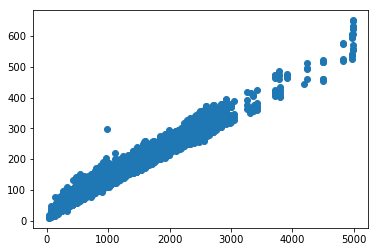

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

sample = df2.sample(50000)

plt.scatter(sample['Distance'], sample['AirTime'])

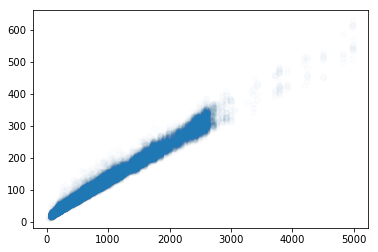

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

sample = df2.sample(50000)

plt.scatter(sample['Distance'], sample['AirTime'], alpha=0.01)

In [221]:
delay_distribution_byplane.shape

(4373, 8)

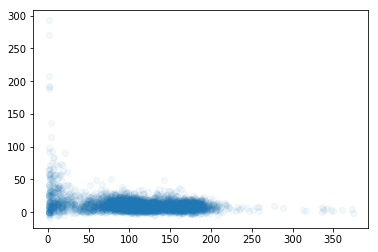

In [225]:
plt.scatter(delay_distribution_byplane['count'], delay_distribution_byplane['mean'], alpha=.05)

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

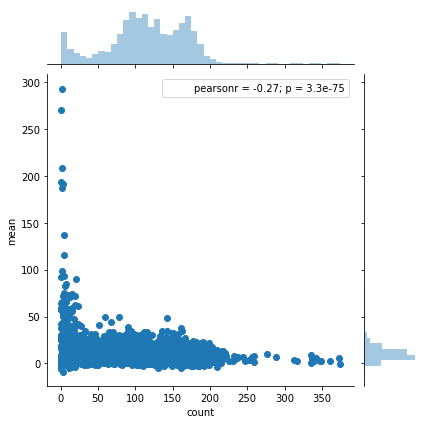

In [230]:
sns.jointplot(data=delay_distribution_byplane, x='count', y='mean')

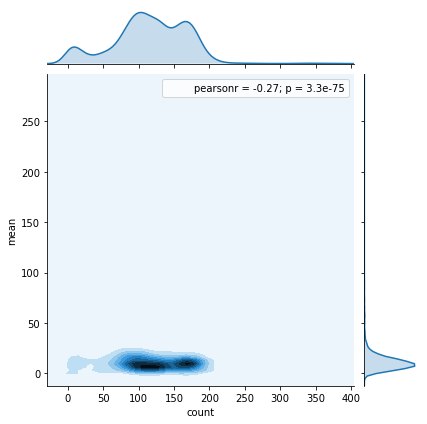

In [229]:
sns.jointplot(data=delay_distribution_byplane, x='count', y='mean', kind='kde')

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

(-50, 500)

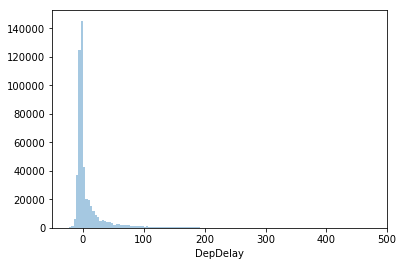

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(df2['DepDelay'].dropna(), bins = 500, kde=False)

axes = plt.gca() 
axes.set_xlim(-50, 500)

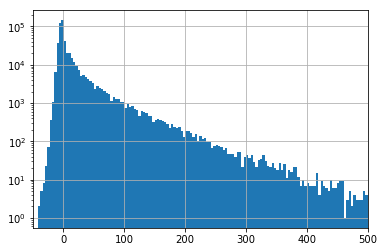

In [258]:
axes = df2['DepDelay'].hist(bins=500)
axes.set_xlim(-50, 500)
plt.yscale('log')
#axes.semilogy()

### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

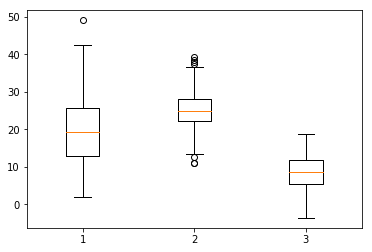

In [261]:
import numpy as np
test = [np.random.randn(150) * 10 + 20, np.random.randn(400) * 5 + 25, np.random.randn(50) * 5 + 10]


plt.boxplot(test);



We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [271]:
deptimes = df2['DepDateTime']

delays_per_hour = df2['DepDelay'].groupby(deptimes.dt.hour)

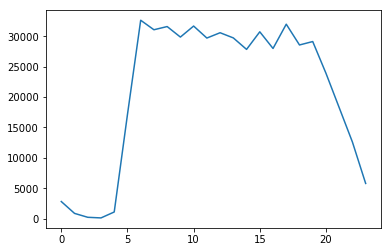

In [272]:
plt.plot(delays_per_hour.count())

In [274]:
type(delays_per_hour.groups)

dict

In [283]:
keys = []
groups = []


for key, group in delays_per_hour:
    keys.append(key)
    groups.append(group)
    
groups[0].head()

609    272.0
845     64.0
858     93.0
861     76.0
969    157.0
Name: DepDelay, dtype: float64

In [304]:
keys, groups = zip(*[(int(key), group) for key, group in delays_per_hour])

In [290]:
a = [(1,2), (3,4), (5,6)]

b = list(zip(*a))

b

[(1, 3, 5), (2, 4, 6)]

In [291]:
pow(2, 3)

8

In [293]:
l = [2, 3]

pow(*l)

8

(-50, 250)

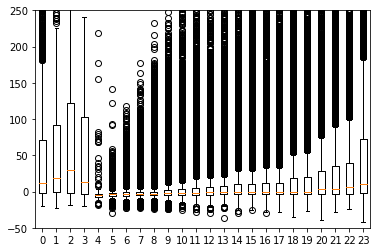

In [313]:
plt.boxplot(groups, labels=keys);

plt.gca().set_ylim(-50, 250)

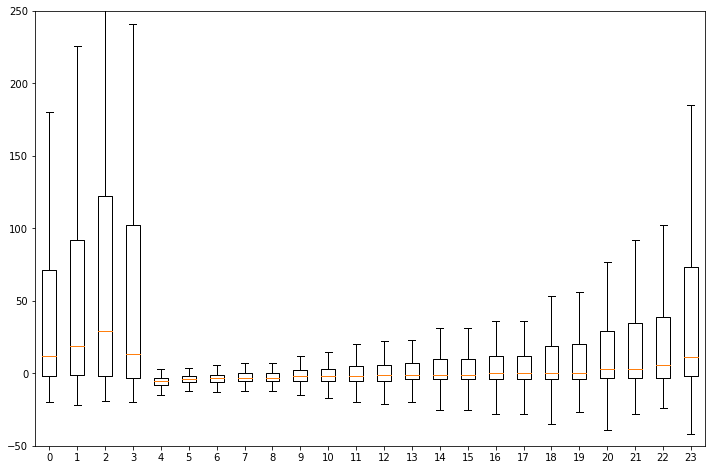

In [315]:
plt.boxplot(groups, labels=keys, showfliers=False)

plt.gca().set_ylim(-50, 250)
plt.gcf().set_size_inches(12, 8);